# Activty 7

1. Open the page in a separate Chrome/Firefox tab and use something like an
Inspect Element tool to view the source HTML and understand its structure

2. Read the page using bs4

In [82]:
from bs4 import BeautifulSoup
import pandas as pd

In [83]:
wiki_page = "/Users/theranmeadows/Desktop/dsc540datapreparation/week5&6/List of countries by GDP (nominal) - Wikipedia.htm"

fd = open( wiki_page, "r")
soup = BeautifulSoup(fd)


3. Find the table structure you will need to deal with (how many tables there are?)

In [84]:
tables = soup.find_all("table")
len(tables)

9

7 tables

4. Find the right table using bs4

In [92]:
gdp_table = soup.find("table", {"class": '"wikitable"|}'})
print(type(gdp_table))

<class 'bs4.element.Tag'>


5. Separate the source names and their corresponding data

In [93]:
sources = gdp_table.tbody.findAll('tr', recursive = False)[0]
sources_list = [td for td in sources.findAll('td')]
print(len(sources_list))

3


6. Get the source names from the list of sources you have created


In [94]:
data = gdp_table.tbody.findAll('tr', recursivec = False)[1].findAll('td',
recursive = False)

In [95]:
data_tables = []
for td in data:
    data_tables.append(td.findAll('table'))

In [96]:
data_tables

[[<table class="wikitable sortable jquery-tablesorter" style="margin-left:auto; margin-right:auto; margin-top:0;">
  <thead><tr>
  <th class="headerSort" data-sort-type="number" role="columnheader button" style="width:2em;" tabindex="0" title="Sort ascending">Rank</th>
  <th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">Country</th>
  <th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">GDP<br/>(US$MM)
  </th></tr></thead><tbody>
  <tr style="font-weight:bold;background:#eaecf0">
  <td data-sort-value="-1"> </td>
  <td data-sort-value=""><span class="flagicon" style="padding-left:25px;"> </span><i><a href="https://en.wikipedia.org/wiki/Gross_world_product" title="Gross world product">World</a></i><sup class="reference" id="cite_ref-IMF_Groups_19-1"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-IMF_Groups-19">[19]</a></sup></td>
  <td align="right">79,865,481
  </td></tr>
  <tr>
  

In [97]:
len(data_tables)

3

In [98]:
source_names = [source.findAll('a')[0].getText() for source in sources_list]
print(source_names)

['International Monetary Fund', 'World Bank', 'United Nations']


7. Separate the header and data from the data that you separated before for the first
source only, and then create a DataFrame using that


In [117]:
header1 = [th.getText().strip() for th in data_tables[0][0].findAll('thead')
[0].findAll('th')]

In [118]:
rows1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')[1:]

In [119]:
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in
rows1]

In [120]:
df1 = pd.DataFrame(data_rows1, columns=header1)
df1.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,600"
1,2,China[n 1],"12,014,610"
2,3,Japan,"4,872,135"
3,4,Germany,"3,684,816"
4,5,United Kingdom,"2,624,529"


8. Repeat the last task for the other two data sources

In [122]:
header2 = [th.getText().strip() for th in data_tables[1][0].findAll('thead')
[0].findAll('th')]

In [123]:
rows2 = data_tables[1][0].findAll('tbody')[0].findAll('tr')[1:]

In [124]:
data_rows2 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in
rows1]

In [125]:
def find_right_text(i, td):
 if i == 0:
    return td.getText().strip()
 elif i == 1:
    return td.getText().strip()
 else:
    index = td.text.find("♠")
    return td.text[index+1:].strip()

In [126]:
data_rows2 = [[find_right_text(i, td) for i, td in enumerate(tr.
findAll('td'))] for tr in rows2]

In [127]:
df2 = pd.DataFrame(data_rows2, columns=header2)
df2.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


In [128]:
header3 = [th.getText().strip() for th in data_tables[2][0].findAll('thead')
[0].findAll('th')]

In [129]:
rows3 = data_tables[2][0].findAll('tbody')[0].findAll('tr')[1:]

In [130]:
data_rows3 = [[find_right_text(i, td) for i, td in enumerate(tr.
findAll('td'))] for tr in rows2]

In [131]:
df3 = pd.DataFrame(data_rows3, columns=header3)
df3.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


# Activity 8

1. Read the visit_data.csv file.

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
visit_data = pd.read_csv("/Users/theranmeadows/Desktop/dsc540datapreparation/week5&6/visit_data.csv")
visit_data.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


2. Check for duplicates.

In [135]:
def check_dups(df):
    for column in df:
        if any(df[column].duplicated()) == True:
            print(column + " contains duplicates.")
        else:
            print(column + " does not contain duplicates.")
        

In [136]:
check_dups(visit_data)

id does not contain duplicates.
first_name contains duplicates.
last_name contains duplicates.
email does not contain duplicates.
gender contains duplicates.
ip_address does not contain duplicates.
visit contains duplicates.


3. Check if any essential column contains NaN.

In [140]:
def check_nan(df):
    for column in df:
        if df[column].isnull().values.any() == True:
            print(column + " contains Nan values.")
        else:
            print(column + " does not contain Nan values.")

In [141]:
check_nan(visit_data)

id does not contain Nan values.
first_name contains Nan values.
last_name contains Nan values.
email does not contain Nan values.
gender contains Nan values.
ip_address does not contain Nan values.
visit contains Nan values.


4. Get rid of the outliers.

In [142]:
size_prev = visit_data.shape

In [144]:
visit_data = visit_data[np.isfinite(visit_data['visit'])]

In [145]:
size_after = visit_data.shape

5. Report the size difference.

In [149]:
print("The size of previous data was - {prev[0]} rows and the size of the new one is - {after[0]} rows".format(prev=size_prev, after=size_after))

The size of previous data was - 1000 rows and the size of the new one is - 974 rows


6. Create a box plot to check for outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x11b524590>,
 'caps': [<matplotlib.lines.Line2D at 0x11b601510>,
 'boxes': [<matplotlib.lines.Line2D at 0x11b5f0e50>],
 'medians': [<matplotlib.lines.Line2D at 0x11b60aed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11b60b950>],
 'means': []}

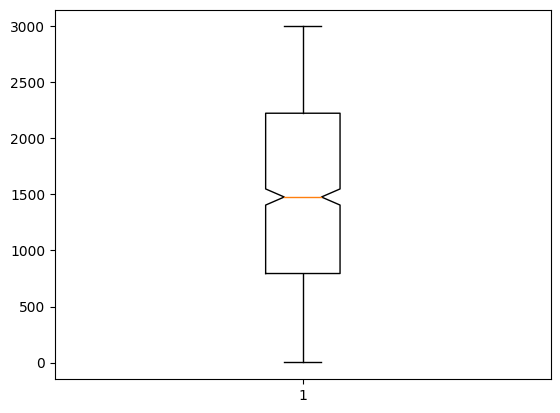

In [151]:
plt.boxplot(visit_data['visit'], notch=True)

7. Get rid of any outliers.

In [152]:
visit_data = visit_data[(visit_data['visit'] <= 2900) & (visit_data['visit'] >= 100)]

In [153]:
print("After getting rid of outliers the new size of the data is - {}".
format(*visit_data.shape))

After getting rid of outliers the new size of the data is - 923


# SQL Lite Database

In [154]:
import sqlite3

In [155]:
conn = sqlite3.connect('mydatabase.sqlite')

In [166]:
c = conn.cursor()

In [157]:
c.execute('create table info_table (name varchar(20), address varchar(20), city varchar(20), state varchar(2), zip integer ,phone integer)')

In [158]:
conn.commit()

In [191]:
c.execute('insert into info_table (name, address, city, state, zip, phone) values ("Alan", "123 Sesame St Store", "New York City", "NY", 18564, 1234567890)')

In [192]:
conn.commit()

In [193]:
c.execute('select * from info_table')

In [194]:
results = c.fetchall()

In [195]:
for drow in results:
    print(drow)

('Elmo', '123 Sesame St', 'New York City', 'NY', 12345, 1234567890)
('Cookie Monster', '123 Sesame St', 'New York City', 'NY', 14444, 1234567890)
('Oscar', '123 Sesame St trash can', 'New York City', 'NY', 54321, 1234567890)
('Big Bird', '123 Sesame St Birds Nest', 'New York City', 'NY', 18934, 1234567890)
('Tellie', '123 Sesame St', 'New York City', 'NY', 54321, 1234567890)
('Rosita', '123 Sesame St building', 'New York City', 'NY', 18564, 1234567890)
('Abbie', '123 Sesame St house', 'New York City', 'NY', 48574, 1234567890)
('Baby Bear', '123 Sesame St apartment', 'New York City', 'NY', 18564, 1234567890)
('Rudy', '123 Sesame St house', 'New York City', 'NY', 48574, 1234567890)
('Alan', '123 Sesame St Store', 'New York City', 'NY', 18564, 1234567890)
